In [ ]:
import nltk
import pandas as pd 
import ast
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Now on to tokenization. Let us get an idea of how many words we will be dealing with . It will give us a much better idea of what vocabulary size we are working with

In [ ]:
df = pd.read_csv("feature_engineered.csv")
df["text_split"] = df.text_split.apply(lambda x: ast.literal_eval(x))


In [ ]:
df

,Unnamed: 0,textID,text,selected_text,sentiment,text_split,selected_text_split,initial_indice,final_indice
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, have, responded, if, i, were, going]","['id', 'have', 'responded', 'if', 'i', 'were',...",0,6
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[soon, sad, i, will, miss, you, here, in, san,...","['soon', 'sad']",0,1
2,2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]","['bullying', 'me']",3,4
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]","['leave', 'me', 'alone']",2,4
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, <curse>, why, couldnt, they, put, t...","['sons', 'of', '<curse>']",0,2
5,7,50e14c0bb8,Soooo high,Soooo high,neutral,"[soon, high]","['soon', 'high']",0,1
6,8,e050245fbd,Both of you,Both of you,neutral,"[both, of, you]","['both', 'of', 'you']",0,2
7,9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,"[journey, wow, u, just, became, cooler, here, ...","['wow', 'u', 'just', 'became', 'cooler']",1,5
8,10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral,"[as, much, as, i, love, to, be, hopeful, i, re...","['as', 'much', 'as', 'i', 'love', 'to', 'be', ...",0,22
9,14,bbe3cbf620,test test from the LG enV2,test test from the LG enV2,neutral,"[test, test, from, the, lg, env<num>]","['test', 'test', 'from', 'the', 'lg', 'env<num>']",0,5


We will somewhat crudely exclude punctuation for ease of visualization

In [ ]:
nltk.download('punkt')
text = []
for word_list in df.text_split:
    text.extend(word_list)
text = [word for word in text if word.isalnum()]


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The code above is putting every word from the tweets into a list and excluding any non alphanumeric characters

In [ ]:
new_text = " ".join(text)
new_text[:50]

'id have responded if i were going soon sad i will miss you here in san my boss is bullying me what interview leave me alone sons of why couldnt they put them on the releases we already bought soon high both of you journey wow u just became cooler here is that as much as i love to be hopeful i reckon the chances are minimal up ibm never gonna get my cake and stuff test test from the lg uh oh i am sunburned hes just not that into you oh early ibm so sorry i hope you find her soon is cleaning the house for her family who is coming later today gotta restart my computer i thought was supposed to put an end to the constant rebootiness see wat i mean bout fridays its called lose friday sh the free filling app on my pod is fun im addicted ibm sorry on the way to malaysia no internet access to twit went to sleep and there is a power cut in nida power back up not working too ibm going home now have you seen my new twitter design quite heavenly if it is any consolation i got my bmi tested sahara

We know put every word into a single string because nltk's word tokenize function expects a string as input. It will then handle the creation of the word occurance chart

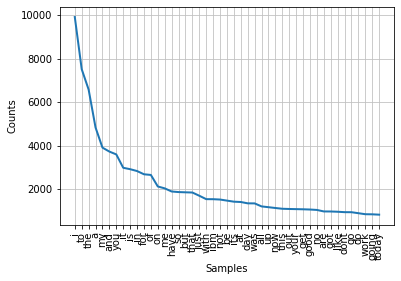

In [ ]:
tknz = nltk.word_tokenize(new_text)
fdist = nltk.FreqDist(tknz)
fdist.plot(45,cumulative=False)

Common words like I, to and the dominate the chart with everthing else rounding out at 2000 occurences or below. This helps inform what the size of the tokenization dictionary should be.

Time to tokenize the text corpus

In [ ]:
tokenizer = Tokenizer(num_words=15000,oov_token="<OOV>")
tokenizer.fit_on_texts(df.text_split)
tokenized_text = tokenizer.texts_to_sequences(df.text_split)
tokenized_selected_text = tokenizer.texts_to_sequences(df.selected_text_split)
len(tokenizer.word_index)

19549

There are 19549 words in our corpus and we will use the most common 15,000 for our model

In [ ]:
pad_token_text = pad_sequences(tokenized_text)
pad_token_selected = pad_sequences(tokenized_selected_text)

Now that the text is padded and tokenized we can prepare a model!